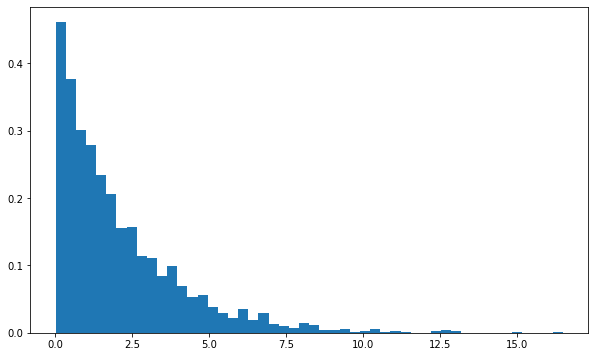

In [30]:
# Import numpy symbols to scipy namespace

import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)


q1 = sp.stats.norm(0, 1)      # Normal(a, b), with Mean = a, S.D = b
q2 = sp.stats.norm(0, 1)      # Normal(a, b), with Mean = a, S.D = b

obs_1 = q1.rvs(2000)
obs_2 = q2.rvs(2000)
obs_3 = (obs_1)**2 + (obs_2)**2
#print(type(obs_3))
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs_3, bins=50, density=True)
#ax.plot(grid, obs_3.pdf(grid), 'k-', linewidth=2)
plt.show()

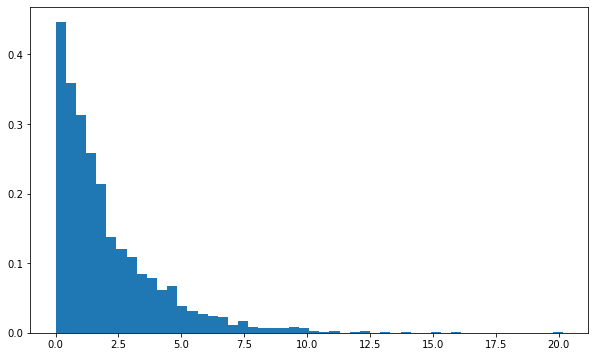